In [2]:
import sys

# Add the parent directory to the system path
sys.path.append("../04_survival_models/src")

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm import tqdm
import itertools
from io import BytesIO
from PIL import Image
import os
import matplotlib.pyplot as plt
from uc2_functions import (
    compare_random_states,
    plot_metric_boxplot,
    plot_features_violin,
)

In [4]:
np.random.seed(42)
sns.set(style="whitegrid")

# Goal

The goal is to compare survival models over Monte Carlo simulations.

# Parameters

In [5]:
DIR_GRANT_FINETUNE = "../02_survival_grant_finetune"
DIR_FEATURE_SELECTION = "../03_survival_feature_selection"
DIR_SURVIVAL_MODELS = "../04_survival_models"
DIR_SSIGN_FINETUNE = "../10_review_survival_ssign_fintetune"
DIR_ARTIFACTS = "artifacts"
DIR_FIGURES = "../review_figures"
PATH_METRICS_GRANT_FINETUNE = "df_metrics_UC2_raw_survival_grant_finetune_2024_05.csv"
PATH_METRICS_FEATURE_SELECTION = "df_metrics_UC2_raw_2024_02.csv"
PATH_METRICS_SURVIVAL_MODELS = "df_metrics_UC2_raw_survival_models_2024_07.csv"
PATH_METRICS_SSIGN_FINETUNE = "df_metrics_UC2_review_ssign_finetune_2025_09_1.csv"
# Number of simulations
S = 100

# Data ingestion

## GRANT finetune

In [6]:
df_metrics_grant_finetune = pd.read_csv(
    os.path.join(DIR_GRANT_FINETUNE, DIR_ARTIFACTS, PATH_METRICS_GRANT_FINETUNE)
)
assert len(df_metrics_grant_finetune["random_state"].unique()) == S
print(df_metrics_grant_finetune.shape)
print(df_metrics_grant_finetune["model"].unique())
df_metrics_grant_finetune.head(2)

(100, 11)
['CoxPHSurvivalAnalysis_grant_finetune_T1']


,model,model_path,random_state,parent_run_id,n_features_in,feature_names_in,best_performance_tuning,concordance_index_censored,concordance_index_ipcw,integrated_brier_score,mean_cumulative_dynamic_auc
0,CoxPHSurvivalAnalysis_grant_finetune_T1,raw_CoxPHSurvivalAnalysis_grant_finetune_T1_91...,914,7fe8ecc9-f795-43e3-81cc-06364e591407,4,['ANM_1_age_binary' 'IST_1_kidney1Pathological...,NaN,0.862387,0.860756,0.032973,0.856554
1,CoxPHSurvivalAnalysis_grant_finetune_T1,raw_CoxPHSurvivalAnalysis_grant_finetune_T1_99...,996,d0b45547-c4d5-4733-b7e3-8f9c325bcc4d,4,['ANM_1_age_binary' 'IST_1_kidney1Pathological...,NaN,0.780830,0.776292,0.035596,0.805372


## Feature selection models

In [7]:
df_metrics_feature_selection = pd.read_csv(
    os.path.join(DIR_FEATURE_SELECTION, DIR_ARTIFACTS, PATH_METRICS_FEATURE_SELECTION)
)
assert len(df_metrics_feature_selection["random_state"].unique()) == S
df_metrics_feature_selection["model"] = df_metrics_feature_selection["model"].replace(
    {"CoxPHSurvivalAnalysis_grant_finetune_T1": "CoxPHSurvivalAnalysis_grant_plus_T1"}
)
print(df_metrics_feature_selection.shape)
print(df_metrics_feature_selection["model"].unique())
df_metrics_feature_selection.head(2)

(300, 11)
['RandomSurvivalForest_selector_T0' 'RandomSurvivalForest_selector_T1'
 'CoxPHSurvivalAnalysis_grant_plus_T1']


,model,model_path,random_state,parent_run_id,n_features_in,feature_names_in,best_performance_tuning,concordance_index_censored,concordance_index_ipcw,integrated_brier_score,mean_cumulative_dynamic_auc
0,RandomSurvivalForest_selector_T0,../models_json/raw_RandomSurvivalForest_select...,914,136690ec-55ab-46b4-beef-22c6ef68009f,106,More than 50 features,-0.860191,0.834955,0.826034,0.036760,0.865922
1,RandomSurvivalForest_selector_T1,../models_json/raw_RandomSurvivalForest_select...,914,136690ec-55ab-46b4-beef-22c6ef68009f,206,More than 50 features,-0.901264,0.884324,0.871572,0.032311,0.914454


## Survival models

In [8]:
df_metrics_survival_models = pd.read_csv(
    os.path.join(DIR_SURVIVAL_MODELS, DIR_ARTIFACTS, PATH_METRICS_SURVIVAL_MODELS)
)
assert len(df_metrics_survival_models["random_state"].unique()) == S
print(df_metrics_survival_models.shape)
print(df_metrics_survival_models["model"].unique())
df_metrics_survival_models.head(2)

(1400, 11)
['SurvivalTree_T0' 'CoxPHSurvivalAnalysis_T0' 'CoxnetSurvivalAnalysis_T0'
 'ExtraSurvivalTrees_T0' 'RandomSurvivalForest_T0'
 'GradientBoostingSurvivalAnalysis_T0'
 'ComponentwiseGradientBoostingSurvivalAnalysis_T0' 'SurvivalTree_T1'
 'CoxPHSurvivalAnalysis_T1' 'CoxnetSurvivalAnalysis_T1'
 'ExtraSurvivalTrees_T1' 'RandomSurvivalForest_T1'
 'GradientBoostingSurvivalAnalysis_T1'
 'ComponentwiseGradientBoostingSurvivalAnalysis_T1']


,model,model_path,random_state,parent_run_id,n_features_in,feature_names_in,best_performance_tuning,concordance_index_censored,concordance_index_ipcw,integrated_brier_score,mean_cumulative_dynamic_auc
0,SurvivalTree_T0,raw_SurvivalTree_T0_914.pkl,914,nice_neck_vjjn5n0fl2,10,NaN,-0.889352,0.747793,0.726216,0.039171,0.802505
1,CoxPHSurvivalAnalysis_T0,raw_CoxPHSurvivalAnalysis_T0_914.pkl,914,nice_neck_vjjn5n0fl2,13,NaN,-0.915822,0.796847,0.782320,0.039489,0.828209


# SSIGN finetune

In [9]:
df_metrics_ssign_finetune = pd.read_csv(
    os.path.join(DIR_SSIGN_FINETUNE, DIR_ARTIFACTS, PATH_METRICS_SSIGN_FINETUNE)
)
assert len(df_metrics_ssign_finetune["random_state"].unique()) == S
print(df_metrics_ssign_finetune.shape)
df_metrics_ssign_finetune
print(df_metrics_ssign_finetune["model"].unique())
df_metrics_ssign_finetune.head(2)

(200, 11)
['CoxPHSurvivalAnalysis_ssign_finetune_T1'
 'CoxPHSurvivalAnalysis_ssign_univariate_T1']


,model,model_path,random_state,parent_run_id,n_features_in,feature_names_in,best_performance_tuning,concordance_index_censored,concordance_index_ipcw,integrated_brier_score,mean_cumulative_dynamic_auc
0,CoxPHSurvivalAnalysis_ssign_finetune_T1,raw_CoxPHSurvivalAnalysis_ssign_finetune_T1_99...,996,077b60b4-5196-4559-8d92-11d1a26c8177,5,['ssign_component_pT' 'ssign_component_pN' 'ss...,NaN,0.822327,0.815849,0.033557,0.840513
1,CoxPHSurvivalAnalysis_ssign_univariate_T1,raw_CoxPHSurvivalAnalysis_ssign_univariate_T1_...,996,077b60b4-5196-4559-8d92-11d1a26c8177,1,['ssign_score'],NaN,0.781101,0.771651,0.033450,0.800591


# Compare random states

In [10]:
# Dictionary of DataFrames with their variable names as keys
dataframes = {
    "df_metrics_grant_finetune": df_metrics_grant_finetune,
    "df_metrics_feature_selection": df_metrics_feature_selection,
    "df_metrics_survival_models": df_metrics_survival_models,
    "df_metrics_ssign_finetune": df_metrics_ssign_finetune,
}

# Generate all possible combinations of the dataframes
combinations = itertools.combinations(dataframes.items(), 2)

# Compare each combination
for (name1, df1), (name2, df2) in combinations:
    compare_random_states(df1, df2, name1, name2)

# Concat

In [11]:
time_groups = {
    "T0 selector": ["RandomSurvivalForest_selector_T0"],
    "T0 models": [
        "SurvivalTree_T0",
        "CoxPHSurvivalAnalysis_T0",
        "CoxnetSurvivalAnalysis_T0",
        "RandomSurvivalForest_T0",
        "ExtraSurvivalTrees_T0",
        "GradientBoostingSurvivalAnalysis_T0",
        "ComponentwiseGradientBoostingSurvivalAnalysis_T0",
    ],
    "T1 benchmark": [
        "CoxPHSurvivalAnalysis_grant_finetune_T1",
        "CoxPHSurvivalAnalysis_grant_plus_T1",
        "CoxPHSurvivalAnalysis_ssign_finetune_T1",
        "CoxPHSurvivalAnalysis_ssign_univariate_T1",
    ],
}

color_groups = {
    "T0 selector": "#ec7d10",
    "T0 models": "#fc2f00",
    "T1 benchmark": "#7f7f7f",
    "Other": "#d000ff",
}

In [12]:
# All metrics for raw dataset
df_metrics = pd.concat(
    [
        df_metrics_grant_finetune,
        df_metrics_feature_selection,
        df_metrics_survival_models,
        df_metrics_ssign_finetune,
    ]
)

df_metrics["dataset"] = "Raw DBURI dataset"
df_metrics_t0 = df_metrics[
    (~df_metrics["model"].str.lower().str.contains("_t1"))
    | (df_metrics["model"] == "CoxPHSurvivalAnalysis_grant_finetune_T1")
    #    | (df_metrics["model"] == "CoxPHSurvivalAnalysis_grant_plus_T1")
    #    | (df_metrics["model"] == "CoxPHSurvivalAnalysis_ssign_finetune_T1")
    | (df_metrics["model"] == "CoxPHSurvivalAnalysis_ssign_univariate_T1")
]

# EDA on metrics

In [13]:
dict_fig = dict()

## All models on raw dataset at T0

<Axes: title={'center': 'concordance_index_censored'}, ylabel='Value over MCCV Simulations'>

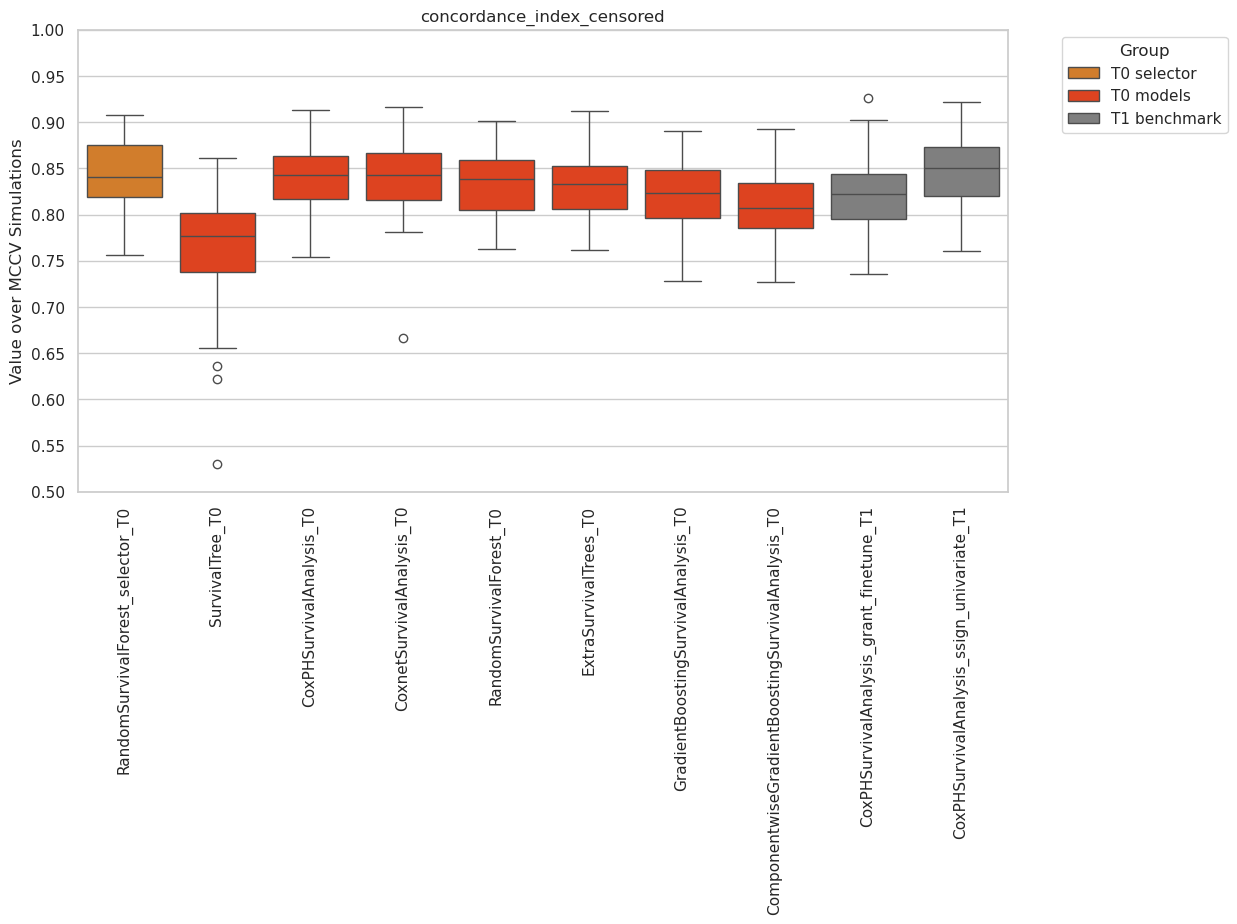

In [14]:
plot_metric_boxplot(
    df_metrics_t0, "concordance_index_censored", time_groups, color_groups
)

<Axes: title={'center': 'concordance_index_ipcw'}, ylabel='Value over MCCV Simulations'>

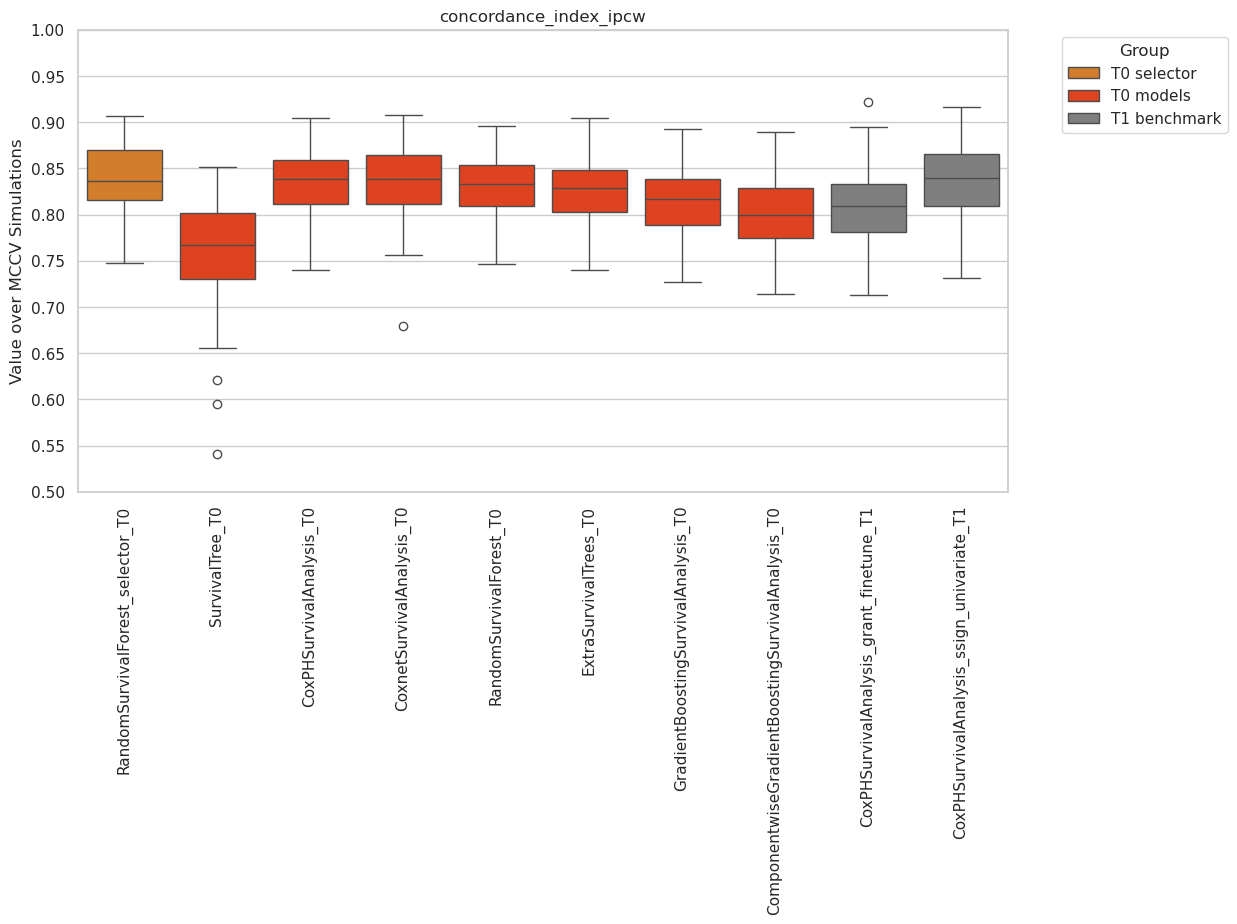

In [15]:
plot_metric_boxplot(df_metrics_t0, "concordance_index_ipcw", time_groups, color_groups)

<Axes: title={'center': 'integrated_brier_score'}, ylabel='Value over MCCV Simulations'>

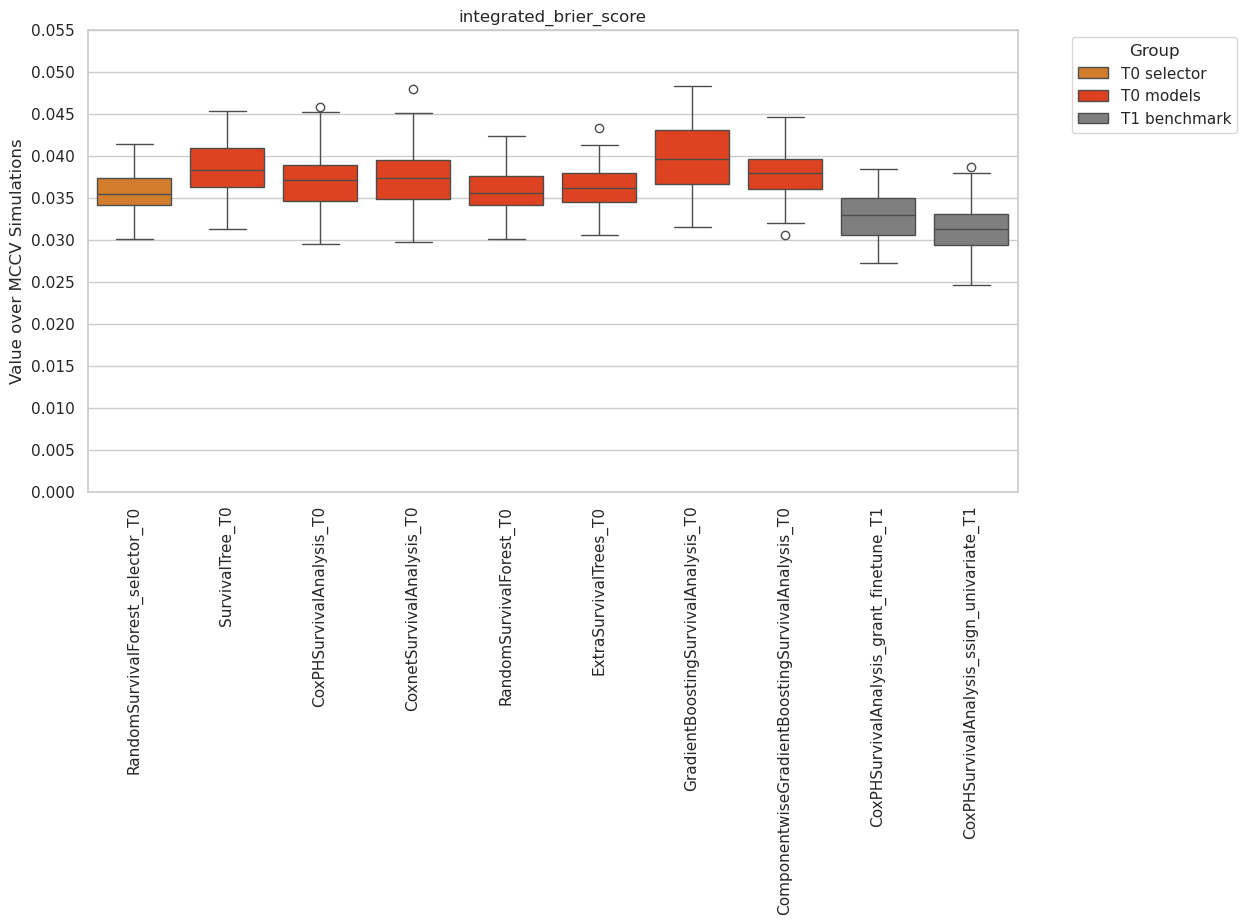

In [16]:
plot_metric_boxplot(df_metrics_t0, "integrated_brier_score", time_groups, color_groups)

<Axes: title={'center': 'mean_cumulative_dynamic_auc'}, ylabel='Value over MCCV Simulations'>

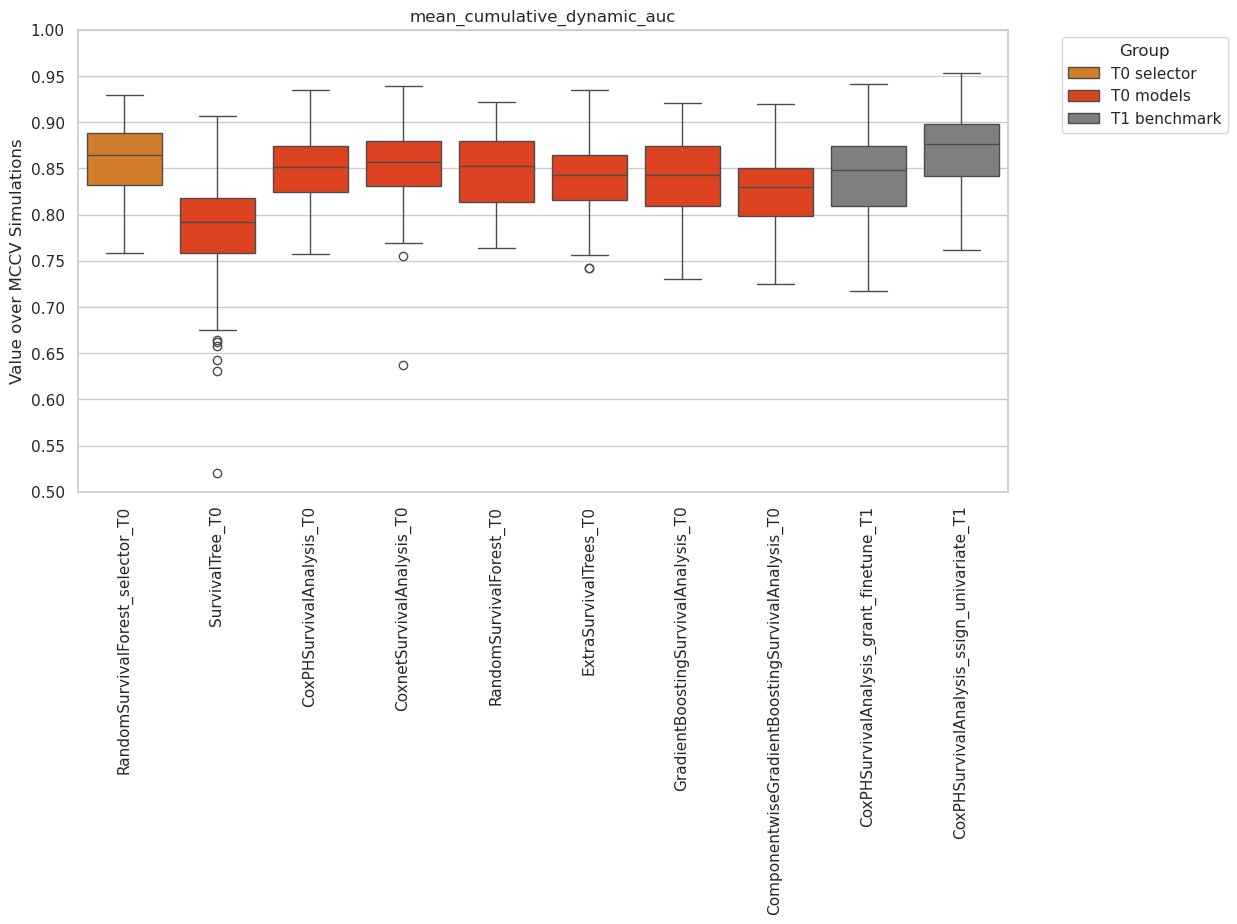

In [17]:
plot_metric_boxplot(
    df_metrics_t0, "mean_cumulative_dynamic_auc", time_groups, color_groups
)

### Multiple plots in 1 figure

3it [00:00,  4.61it/s]


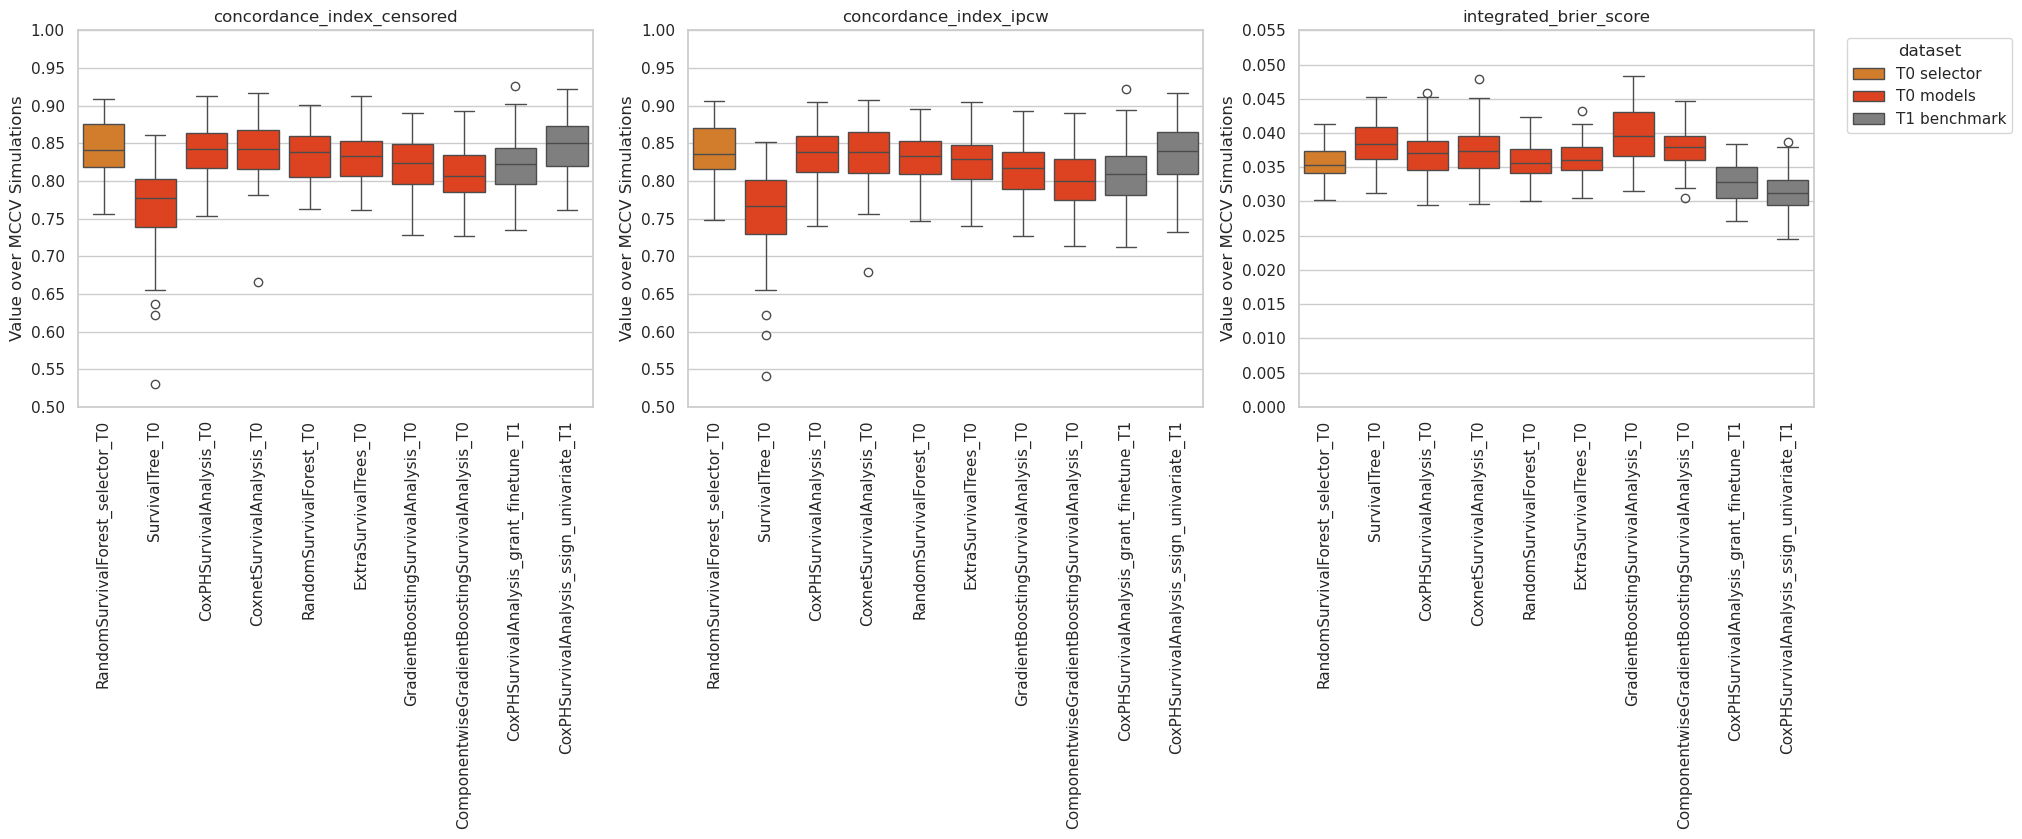

In [18]:
metrics = [
    "concordance_index_censored",
    "concordance_index_ipcw",
    "integrated_brier_score",
]
hue_column = "dataset"


# Determine the number of metrics to set up subplots
num_metrics = len(metrics)
cols = 3  # Number of columns in the subplot grid
rows = (num_metrics + cols - 1) // cols  # Calculate the number of rows needed
# Create the composite figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9), squeeze=False)
axes_flat = axes.flatten()

dict_fig = {}
for idx, metric in tqdm(enumerate(metrics)):
    ax = axes_flat[idx]
    plot_metric_boxplot(
        df_metrics=df_metrics_t0,
        metric=metric,
        time_groups=time_groups,
        color_groups=color_groups,
        hue_column=None,
        ax=ax,
    )
    if idx == len(metrics) - 1:
        # Add legend to the last ax
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(
            handles,
            labels,
            title=hue_column,
            loc="upper left",
            bbox_to_anchor=(1.05, 1),
            ncol=1,
        )
    else:
        # Remove legend
        ax.get_legend().remove()
    dict_fig[metric] = ax

# Hide any unused subplots
for idx in range(len(metrics), len(axes_flat)):
    fig.delaxes(axes_flat[idx])
# Adjust layout to accommodate the suptitle and the single legend
plt.tight_layout(rect=[0, 0, 0.85, 0.95])

# **Saving with Pillow to Control JPEG Quality**
# Create a buffer to save the figure as PNG
buf = BytesIO()
fig.savefig(buf, format="png", dpi=300, bbox_inches="tight")
buf.seek(0)
# Open the image with Pillow and save as JPEG with desired quality
img = Image.open(buf)
os.makedirs(DIR_FIGURES, exist_ok=True)
img.convert("RGB").save(
    os.path.join(DIR_FIGURES, "raw_t0_mccv_internal_val.jpg"), format="JPEG", quality=95
)
plt.show()

# Number of features

## T0

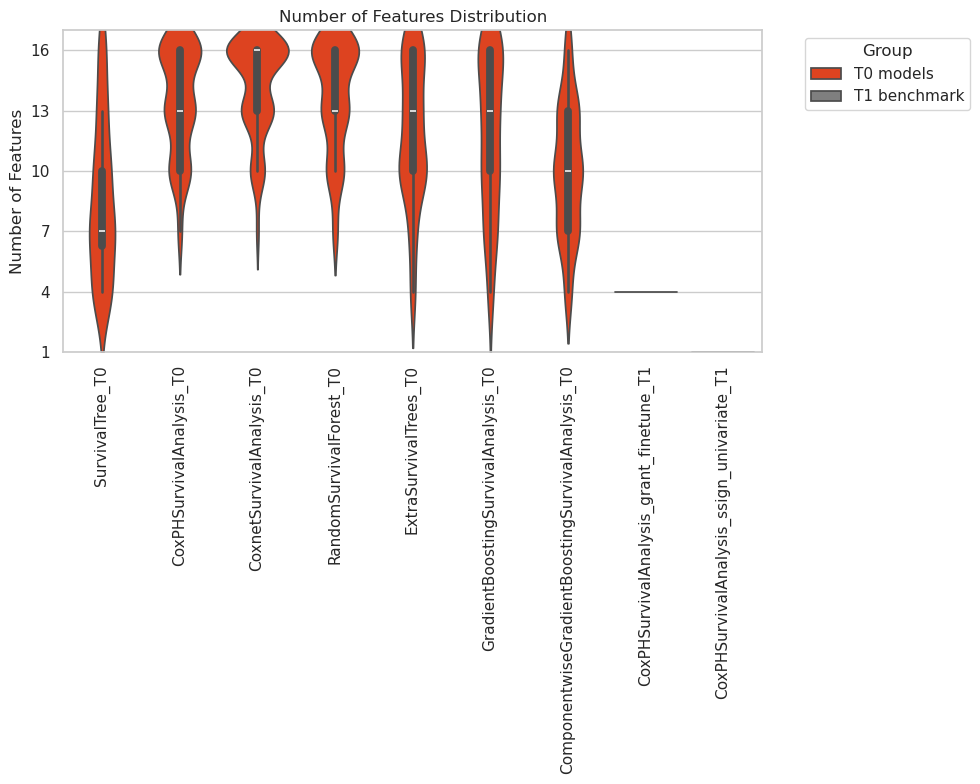

In [19]:
to_drop = time_groups["T0 selector"]
df_plot = df_metrics_t0[~df_metrics_t0["model"].isin(to_drop)]
plot_features_violin(df_plot, time_groups, color_groups, figsize=(10, 8))

## Table with all metrics

In [20]:
assert len(df_metrics["random_state"].unique()) == S
# Aggregate the metrics to get both mean and standard deviation
df_metrics_agg = (
    df_metrics_t0.groupby(["model", "dataset"])[
        [
            "best_performance_tuning",
            "concordance_index_censored",
            "concordance_index_ipcw",
            "mean_cumulative_dynamic_auc",
            "integrated_brier_score",
            "n_features_in",
        ]
    ].agg(["mean"])
).droplevel(1, axis=1)
# Calculate the delta tuning validation using the mean values
df_metrics_agg[("delta_tuning_validation")] = (
    -df_metrics_agg[("best_performance_tuning")]
    - df_metrics_agg[("concordance_index_censored")]
)
# Drop the best_performance_tuning columns (both mean and std)
df_metrics_agg.drop(("best_performance_tuning"), axis=1, inplace=True)
# Round the values to 5 decimal places and sort by concordance_index_ipcw_mean
df_metrics_agg_rounded = df_metrics_agg.round(5).sort_values(
    ("concordance_index_ipcw"), ascending=False
)
df_metrics_agg_rounded

,,concordance_index_censored,concordance_index_ipcw,mean_cumulative_dynamic_auc,integrated_brier_score,n_features_in,delta_tuning_validation
model,dataset,,,,,,
RandomSurvivalForest_selector_T0,Raw DBURI dataset,0.84420,0.83857,0.85897,0.03566,106.00,0.01799
CoxPHSurvivalAnalysis_ssign_univariate_T1,Raw DBURI dataset,0.84742,0.83648,0.87204,0.03114,1.00,NaN
CoxPHSurvivalAnalysis_T0,Raw DBURI dataset,0.84044,0.83395,0.85023,0.03701,13.39,0.08506
CoxnetSurvivalAnalysis_T0,Raw DBURI dataset,0.84097,0.83383,0.85254,0.03740,14.17,0.08675
RandomSurvivalForest_T0,Raw DBURI dataset,0.83511,0.83021,0.84690,0.03592,13.63,0.09091
ExtraSurvivalTrees_T0,Raw DBURI dataset,0.82974,0.82456,0.83914,0.03625,11.77,0.09114
GradientBoostingSurvivalAnalysis_T0,Raw DBURI dataset,0.82211,0.81431,0.83911,0.03979,11.68,0.09338
CoxPHSurvivalAnalysis_grant_finetune_T1,Raw DBURI dataset,0.81864,0.80674,0.84417,0.03281,4.00,NaN
ComponentwiseGradientBoostingSurvivalAnalysis_T0,Raw DBURI dataset,0.80932,0.80034,0.82652,0.03771,9.97,0.08935


`delta_tuning_validation` is an indicator for overfitting.